In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

try:
    from google.colab import drive
    drive.mount('/content/drive')
    workding_dir = "/content/drive/MyDrive/logical-reasoning/"
except ModuleNotFoundError:
    workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
import pandas as pd

df = pd.read_csv("results/mgtv-results_merged_model.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   text                                                                                3000 non-null   object
 1   label                                                                               3000 non-null   object
 2   title                                                                               3000 non-null   object
 3   puzzle                                                                              3000 non-null   object
 4   truth                                                                               3000 non-null   object
 5   llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_epoch_6_NV4080  3000 non-null   obje

In [6]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_epoch_6_NV4080',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_epoch_6_M3',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_M3',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.1',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.0',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.01',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.02',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.03',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.04',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.05',
 'llama-factory/merged_mod

In [7]:
columns = df.columns[10:20].to_list()
columns.append(df.columns.to_list()[9])
columns += df.columns[20:].to_list()
columns

['llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.0',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.01',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.02',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.03',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.04',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.05',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.06',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.07',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.08',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.09',
 'llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.1',
 'inflaton/InternLM_2_5-7b_LR_NV4080_rp1.11',
 'inflaton

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams


def plot_value_counts(df, column):
    font_family = rcParams["font.family"]
    # Set the font to SimHei to support Chinese characters
    rcParams["font.family"] = "STHeiti"
    rcParams["axes.unicode_minus"] = (
        False  # This is to support the minus sign in Chinese.
    )

    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(kind="bar")
    # add values on top of bars
    for i, v in enumerate(df[column].value_counts()):
        plt.text(i, v + 0.1, str(v), ha="center")
    plt.show()

    rcParams["font.family"] = font_family

********** llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.0 **********
llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.0
不是      1511
是       1142
不重要      256
问法错误      54
回答正确      37
Name: count, dtype: int64


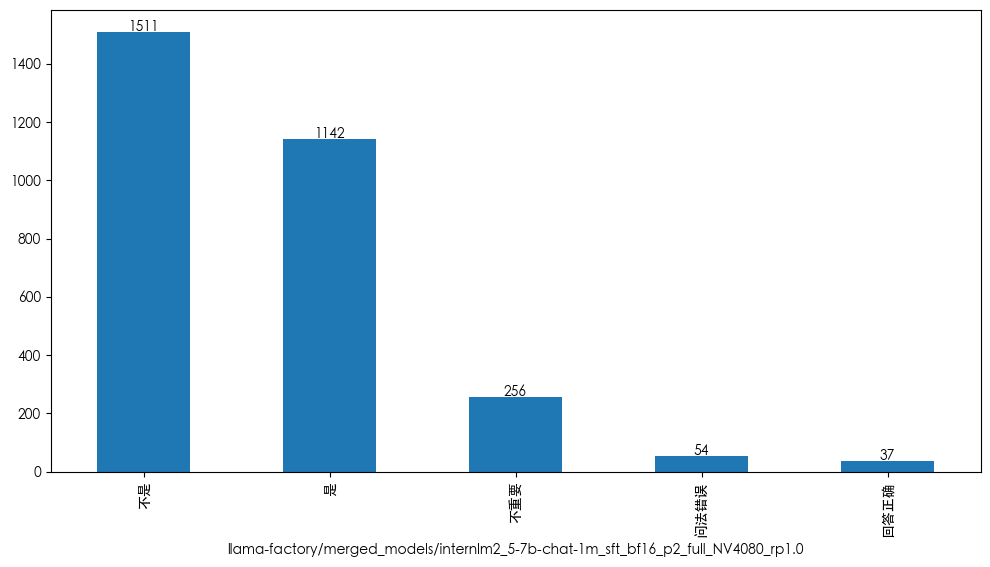

********** llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.01 **********
llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.01
不是      1511
是       1142
不重要      256
问法错误      54
回答正确      37
Name: count, dtype: int64


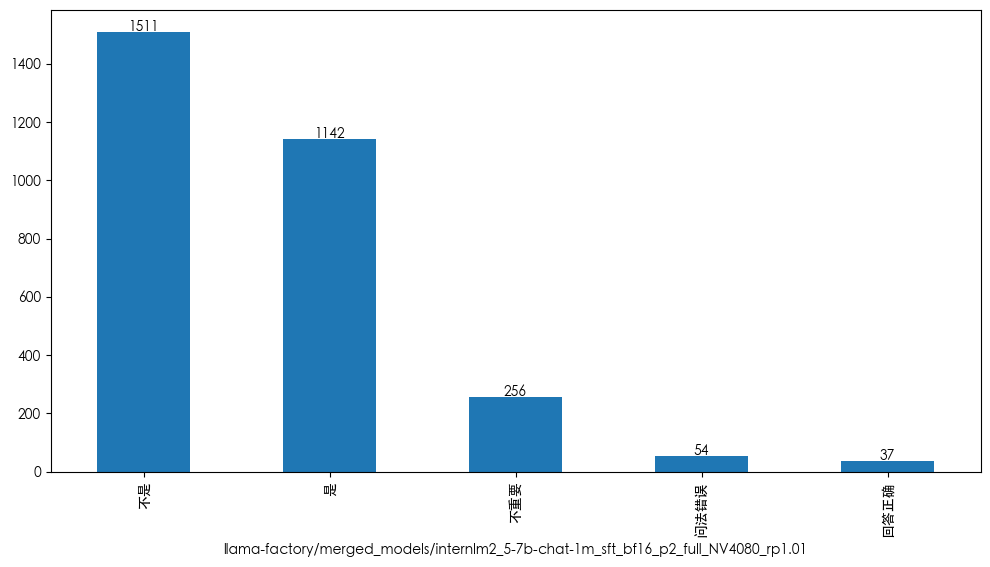

********** llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.02 **********
llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.02
不是      1511
是       1142
不重要      256
问法错误      54
回答正确      37
Name: count, dtype: int64


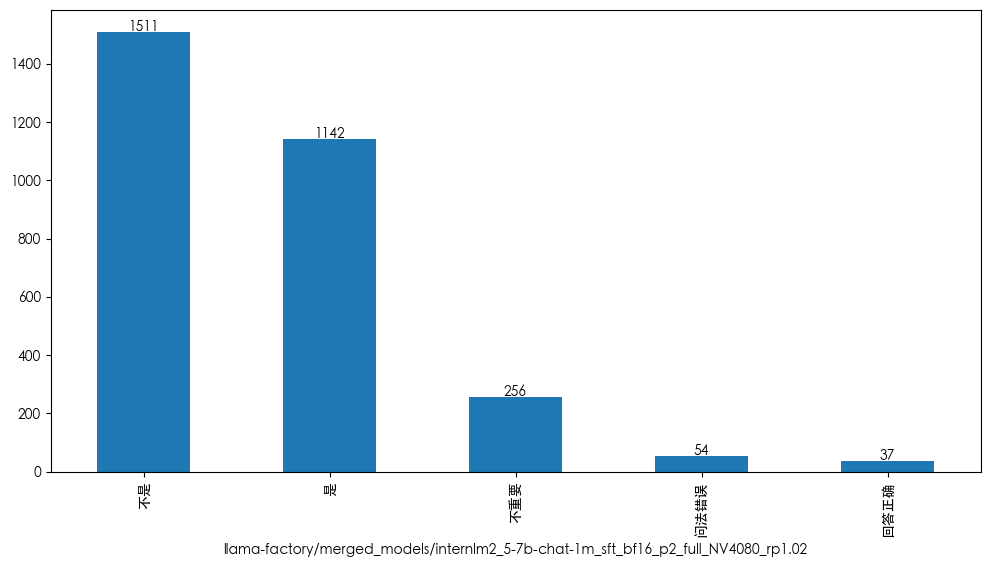

********** llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.03 **********
llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.03
不是      1511
是       1142
不重要      256
问法错误      54
回答正确      37
Name: count, dtype: int64


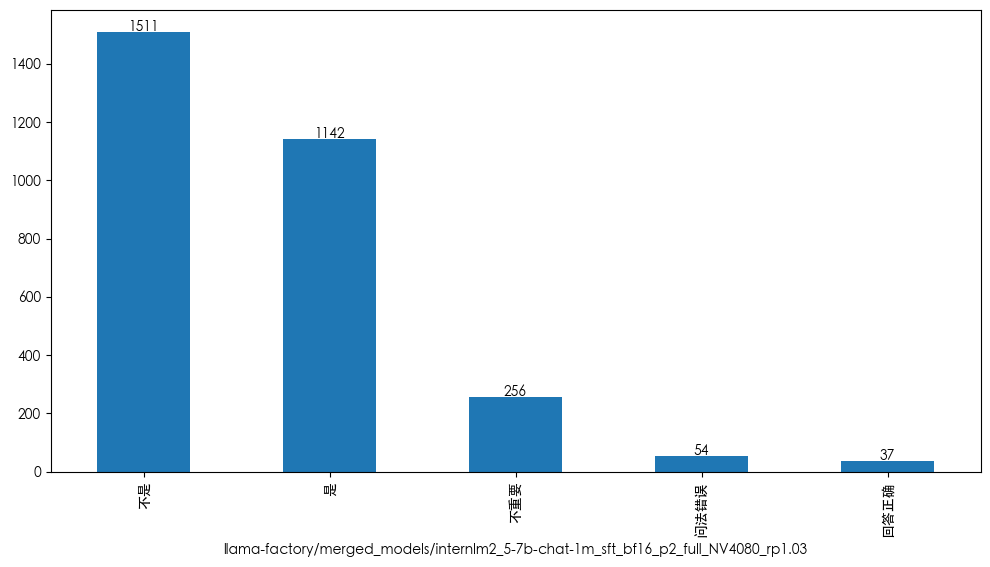

********** llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.04 **********
llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.04
不是      1511
是       1142
不重要      256
问法错误      54
回答正确      37
Name: count, dtype: int64


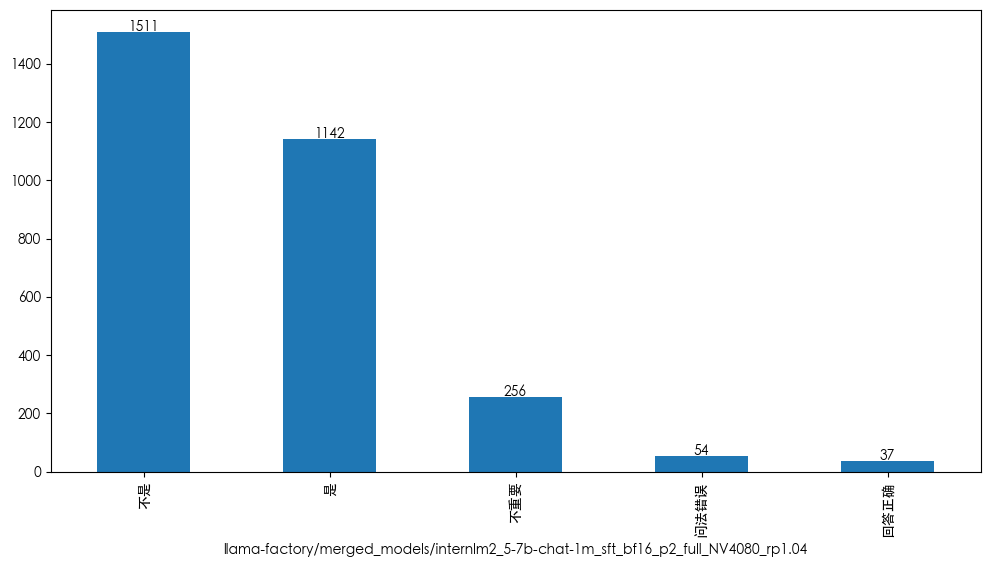

********** llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.05 **********
llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.05
不是      1511
是       1142
不重要      256
问法错误      54
回答正确      37
Name: count, dtype: int64


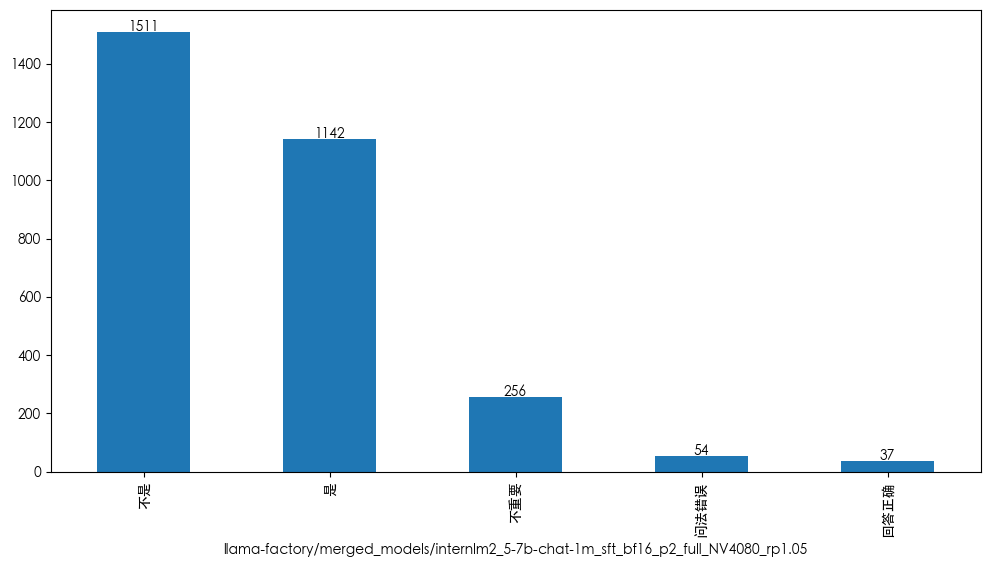

********** llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.06 **********
llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.06
不是      1511
是       1142
不重要      256
问法错误      54
回答正确      37
Name: count, dtype: int64


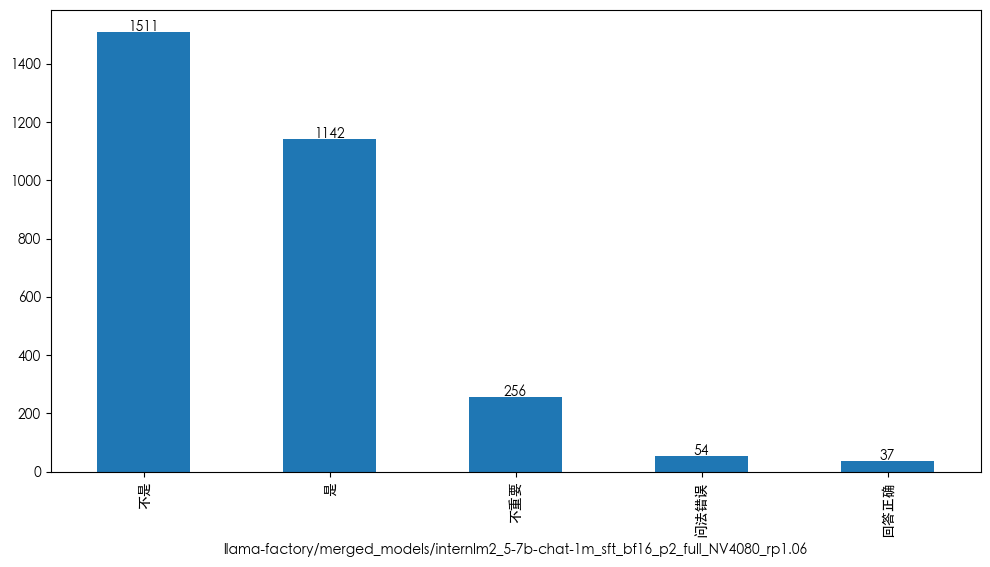

********** llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.07 **********
llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.07
不是      1511
是       1142
不重要      256
问法错误      54
回答正确      37
Name: count, dtype: int64


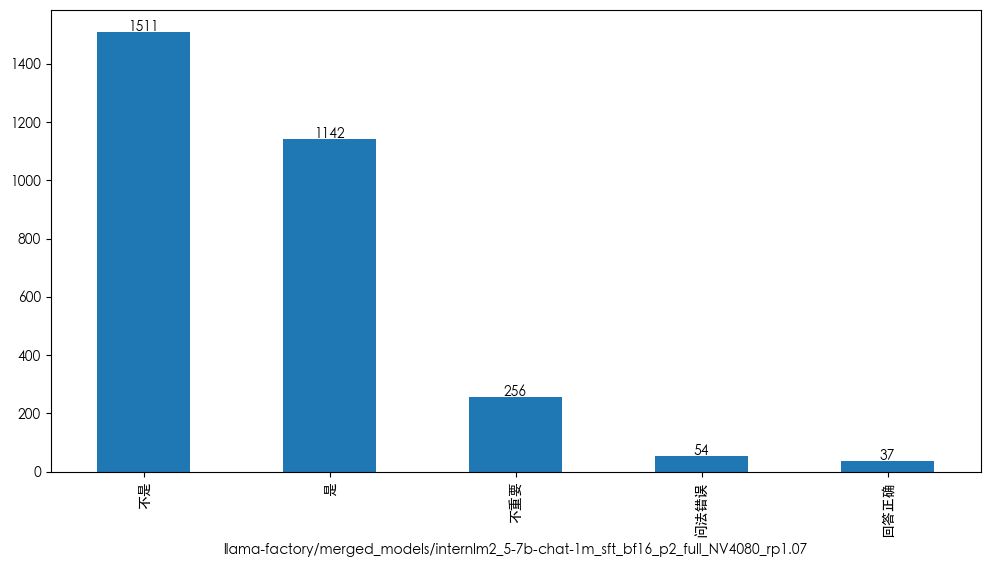

********** llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.08 **********
llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.08
不是      1511
是       1076
不重要      256
是的        66
问法错误      54
回答正确      37
Name: count, dtype: int64


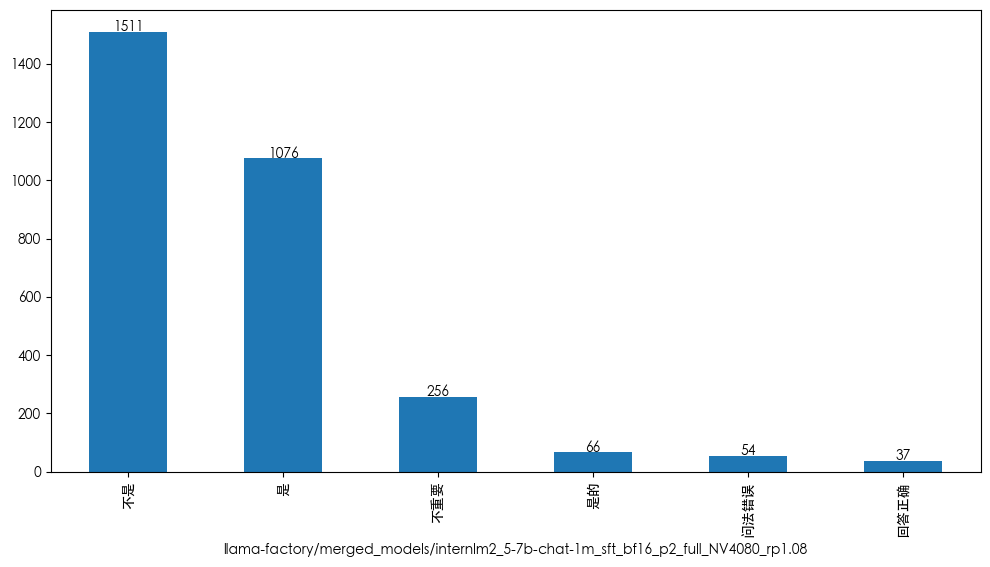

********** llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.09 **********
llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.09
不是      1510
是        675
是的       465
不重要      256
问法错误      54
回答正确      37
重要         2
有          1
Name: count, dtype: int64


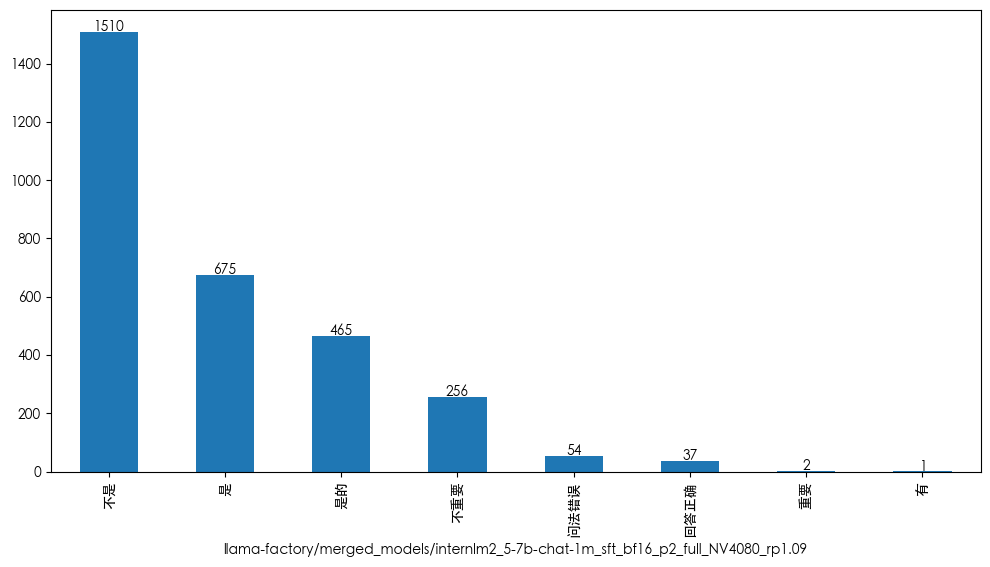

********** llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.1 **********
llama-factory/merged_models/internlm2_5-7b-chat-1m_sft_bf16_p2_full_NV4080_rp1.1
不是         1502
是的          775
是           288
不重要         254
重要           84
问法错误         54
回答正确         37
有             2
是小男孩的         2
为他的爷爷而哭       1
是小男孩          1
Name: count, dtype: int64


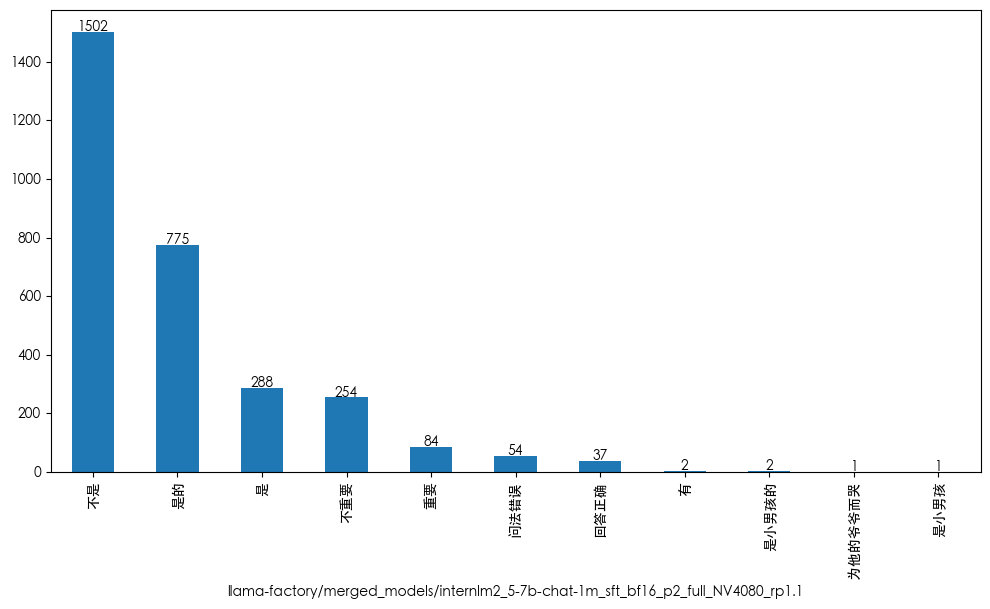

********** inflaton/InternLM_2_5-7b_LR_NV4080_rp1.11 **********
inflaton/InternLM_2_5-7b_LR_NV4080_rp1.11
不是         1429
是的          860
重要          291
不重要         249
是            84
问法错误         42
回答正确         37
是小男孩          3
有             2
是小男孩的         2
为他的爷爷而哭       1
Name: count, dtype: int64


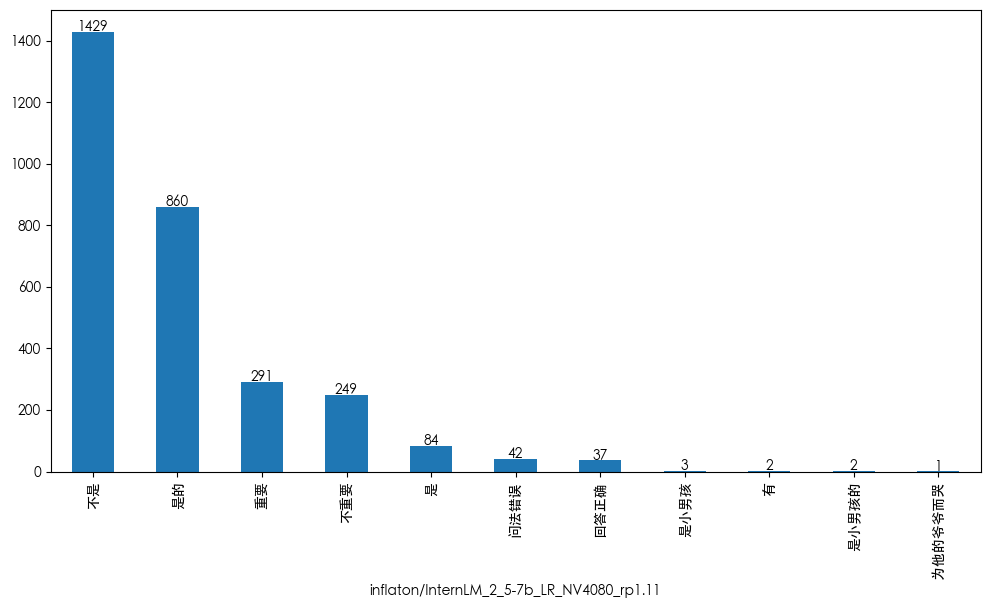

********** inflaton/InternLM_2_5-7b_LR_NV4080_rp1.12 **********
inflaton/InternLM_2_5-7b_LR_NV4080_rp1.12
不是          1310
是的           883
重要           453
不重要          242
回答正确          36
问法错误          34
是             32
是小男孩           3
有              2
是小男孩的          2
没有             1
为他的爷爷          1
为了纪念他的爷爷       1
Name: count, dtype: int64


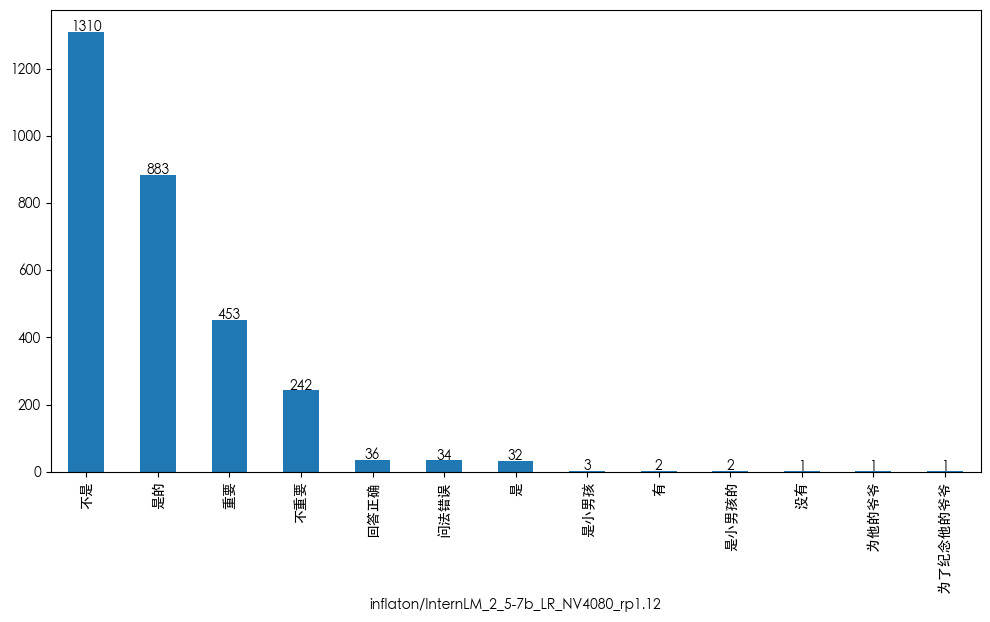

********** inflaton/InternLM_2_5-7b_LR_NV4080_rp1.13 **********
inflaton/InternLM_2_5-7b_LR_NV4080_rp1.13
不是          1141
是的           892
重要           663
不重要          219
回答正确          34
问法错误          22
是             16
是小男孩           3
没有             2
有              2
是小男孩的          2
为他的爷爷          1
重要性不大          1
为了纪念他的爷爷       1
男              1
Name: count, dtype: int64


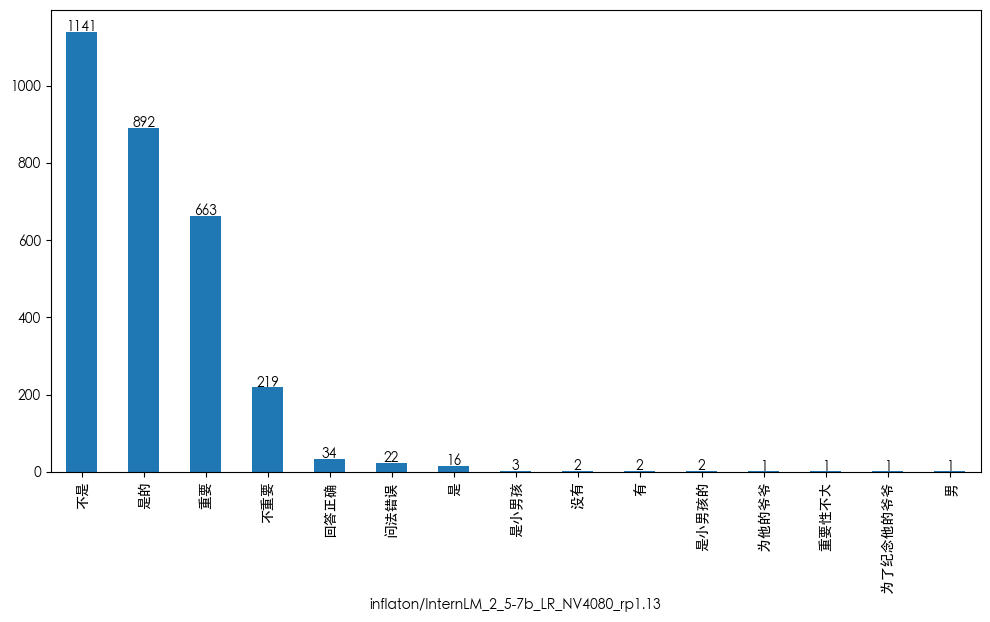

********** inflaton/InternLM_2_5-7b_LR_NV4080_rp1.14 **********
inflaton/InternLM_2_5-7b_LR_NV4080_rp1.14
不是                    954
是的                    899
重要                    889
不重要                   186
回答正确                   27
问法错误                   16
是                       9
是小男孩                    3
没有                      2
是小男孩的                   2
有                       2
男                       1
回答问题时没有按照规定给出正确的回应      1
为了纪念他的爷爷                1
回答问题前需要澄清一点的是，这个        1
否                       1
重要性不大                   1
为他的爷爷                   1
回答问题前需要澄清一点事实细节吗        1
回答问题前需要澄清一点——学生并不是      1
回答问题前需要澄清一点的是，故事        1
回答问题时出现了逻辑混乱的情况（如       1
Name: count, dtype: int64


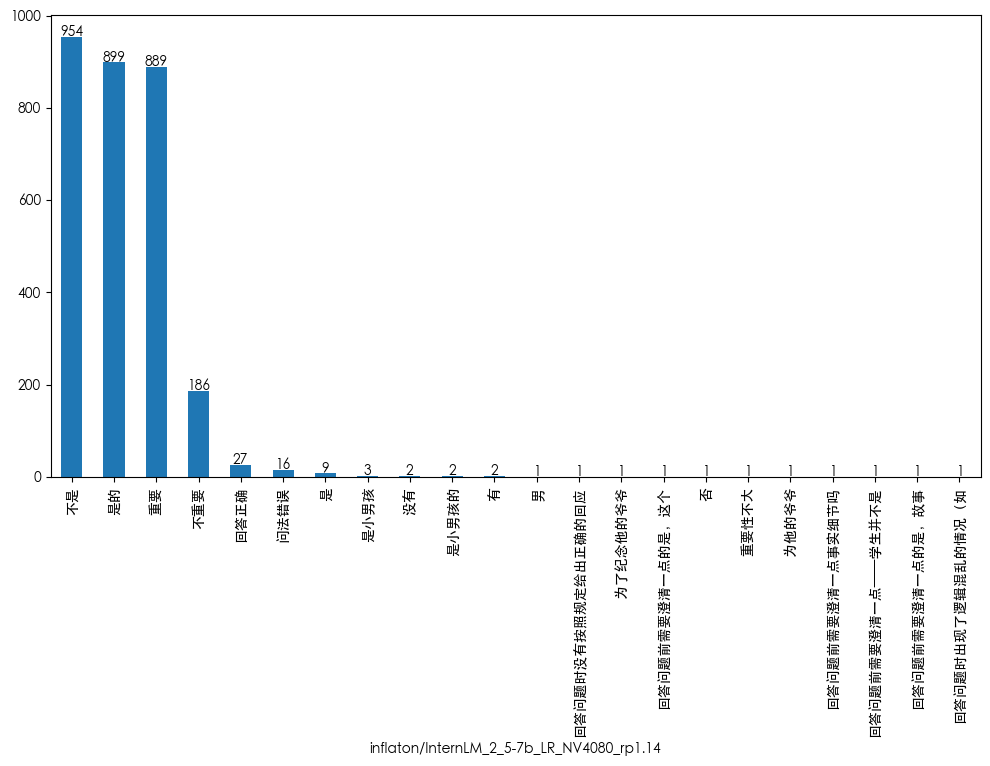

********** inflaton/InternLM_2_5-7b_LR_NV4080_rp1.15 **********
inflaton/InternLM_2_5-7b_LR_NV4080_rp1.15
重要                    1133
是的                     901
不是                     732
不重要                    165
回答正确                    20
问法错误                    11
重要性不大                    5
没有                       4
是                        4
是小男孩                     3
否                        3
回答问题时不需要使用"答非所           2
有                        2
是小男孩的                    2
回答问题时没有按照规定给出正确的回应       2
回答问题前需要澄清一点——学生并不是       1
为了纪念他的爷爷                 1
回答问题时出现了逻辑混乱的情况（如        1
回答问题时未完全符合要求（缺少          1
男                        1
回答问题时不需要使用问号（？）          1
回答问题前需要澄清一点的是这个"         1
为他的爷爷                    1
回答问题前需要澄清一点事实细节吗         1
回答问题前需要澄清一点的是，故事         1
回答问题时不需要使用"答":回答         1
Name: count, dtype: int64


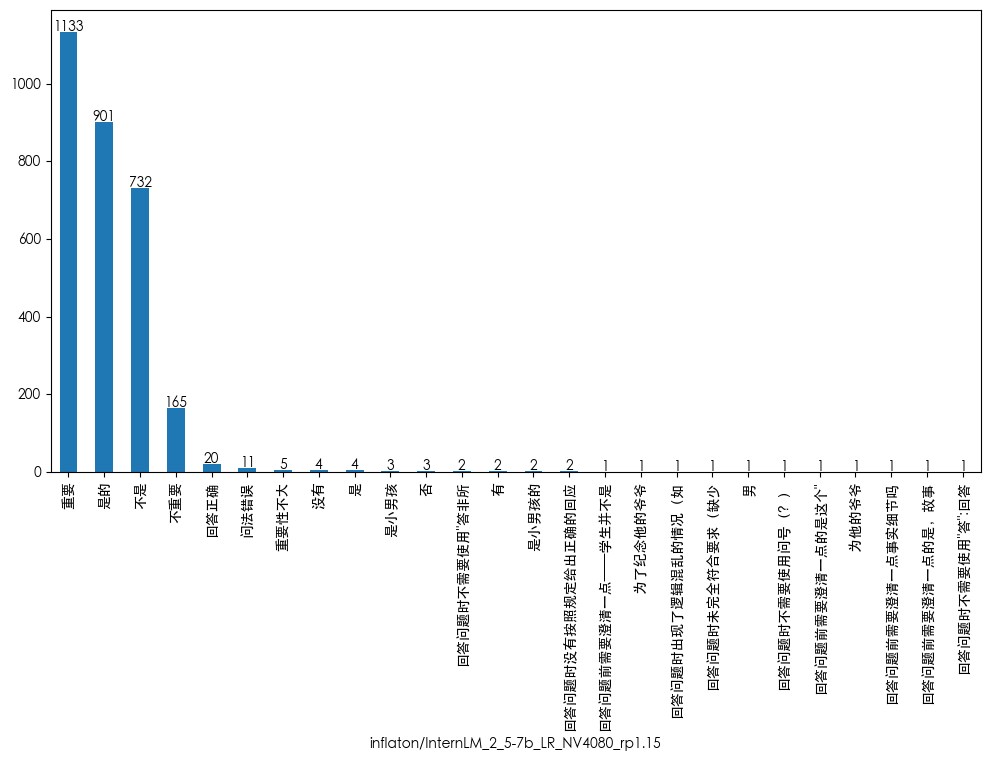

In [9]:
for col in columns:
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col)

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def calc_metrics_for_col(df, col):
    y_true = df["label"]
    y_pred = df[col]
    try:
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(
            y_true, y_pred, average="weighted", labels=np.unique(y_pred)
        )
        recall = recall_score(
            y_true, y_pred, average="weighted", labels=np.unique(y_pred)
        )
        f1 = f1_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
    except Exception as e:
        print(e)
        accuracy = precision = recall = f1 = np.nan

    return accuracy, float(precision), float(recall), float(f1)

In [11]:
import pandas as pd

perf_df = pd.DataFrame(
    columns=["repetition penalty", "model", "accuracy", "precision", "recall", "f1"]
)
for col in columns:
    accuracy, precision, recall, f1 = calc_metrics_for_col(df, col)
    rpp = col.split("_rp")[-1].split("0000")[0]
    new_model_metrics = {
        "repetition penalty": rpp if len(rpp) > 3 else rpp + "0",
        "model": col,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

    # Convert the dictionary to a DataFrame and concatenate it with the existing DataFrame
    perf_df = pd.concat([perf_df, pd.DataFrame([new_model_metrics])], ignore_index=True)

perf_df

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_81872/1650792675.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat([perf_df, pd.DataFrame([new_model_metrics])], ignore_index=True)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in 

repetition penalty                                              model  \
0                1.00  llama-factory/merged_models/internlm2_5-7b-cha...   
1                1.01  llama-factory/merged_models/internlm2_5-7b-cha...   
2                1.02  llama-factory/merged_models/internlm2_5-7b-cha...   
3                1.03  llama-factory/merged_models/internlm2_5-7b-cha...   
4                1.04  llama-factory/merged_models/internlm2_5-7b-cha...   
5                1.05  llama-factory/merged_models/internlm2_5-7b-cha...   
6                1.06  llama-factory/merged_models/internlm2_5-7b-cha...   
7                1.07  llama-factory/merged_models/internlm2_5-7b-cha...   
8                1.08  llama-factory/merged_models/internlm2_5-7b-cha...   
9                1.09  llama-factory/merged_models/internlm2_5-7b-cha...   
10               1.10  llama-factory/merged_models/internlm2_5-7b-cha...   
11               1.11          inflaton/InternLM_2_5-7b_LR_NV4080_rp1.11   
12               1.12          inflaton/InternLM_2_5-7b_LR_NV4080_rp1.12   
13               1.13          inflaton/InternLM_2_5-7b_LR_NV4080_rp1.13   
14               1.14          inflaton/InternLM_2_5-7b_LR_NV4080_rp1.14   
15               1.15          inflaton/InternLM_2_5-7b_LR_NV4080_rp1.15   

    accuracy  precision    recall        f1  
0   0.785000   0.809111  0.785000  0.794725  
1   0.785000   0.809111  0.785000  0.794725  
2   0.785000   0.809111  0.785000  0.794725  
3   0.785000   0.809111  0.785000  0.794725  
4   0.785000   0.809111  0.785000  0.794725  
5   0.785000   0.809111  0.785000  0.794725  
6   0.785000   0.809111  0.785000  0.794725  
7   0.785000   0.809111  0.785000  0.794725  
8   0.766667   0.809899  0.766667  0.784816  
9   0.642333   0.794675  0.642333  0.693413  
10  0.531000   0.786251  0.531000  0.576413  
11  0.464667   0.820275  0.464667  0.493520  
12  0.430333   0.853418  0.430333  0.463769  
13  0.384000   0.882075  0.384000  0.435682  
14  0.330667   0.880426  0.330667  0.402140  
15  0.259000   0.831201  0.259000  0.343243

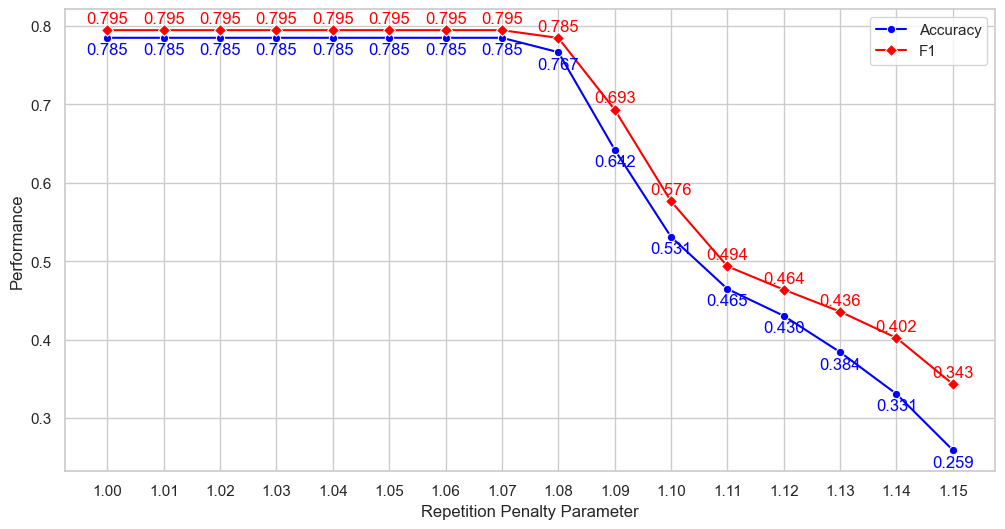

In [12]:
# plot accuracy and f1 vs repetition penalty
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    x="repetition penalty",
    y="accuracy",
    data=perf_df,
    ax=ax,
    color="blue",
    label="Accuracy",
    marker="o"
)

sns.lineplot(
    x="repetition penalty",
    y="f1",
    data=perf_df,
    ax=ax,
    color="red",
    label="F1",
    marker="D"
)

for line_index, line in enumerate(ax.lines):
    # Get the data
    line_color = line.get_color()
    xdata, ydata = line.get_data()
    for index in range(xdata.size):
        ax.annotate(
            f"{ydata[index]:.3f}",
            xy=(xdata[index], ydata[index]),
            textcoords="offset points",
            xytext=(
                0,
                5 if line_index % 2 == 1 else -12,
            ),  # Adjusted for better visibility
            ha="center",
            color=line_color,
        )

plt.xlabel("Repetition Penalty Parameter")
plt.ylabel("Performance")
plt.legend()
plt.show()

In [15]:
perf_df_4bit = pd.read_csv("results/mgtv-results_internlm_4bit_metrics.csv")
perf_df_4bit

repetition penalty                                              model  \
0                 1.00         internlm/internlm2_5-7b-chat-1m_4bit_rp1.0   
1                 1.01        internlm/internlm2_5-7b-chat-1m_4bit_rp1.01   
2                 1.02        internlm/internlm2_5-7b-chat-1m_4bit_rp1.02   
3                 1.03        internlm/internlm2_5-7b-chat-1m_4bit_rp1.03   
4                 1.04        internlm/internlm2_5-7b-chat-1m_4bit_rp1.04   
5                 1.05        internlm/internlm2_5-7b-chat-1m_4bit_rp1.05   
6                 1.06        internlm/internlm2_5-7b-chat-1m_4bit_rp1.06   
7                 1.07        internlm/internlm2_5-7b-chat-1m_4bit_rp1.07   
8                 1.08        internlm/internlm2_5-7b-chat-1m_4bit_rp1.08   
9                 1.09        internlm/internlm2_5-7b-chat-1m_4bit_rp1.09   
10                1.10         internlm/internlm2_5-7b-chat-1m_4bit_rp1.1   
11                1.11        internlm/internlm2_5-7b-chat-1m_4bit_rp1.11   
12                1.12        internlm/internlm2_5-7b-chat-1m_4bit_rp1.12   
13                1.13  internlm/internlm2_5-7b-chat-1m_4bit_rp1.13000...   
14                1.14  internlm/internlm2_5-7b-chat-1m_4bit_rp1.14000...   
15                1.15  internlm/internlm2_5-7b-chat-1m_4bit_rp1.15000...   

    accuracy  precision    recall        f1  
0   0.783000   0.808989  0.783000  0.791868  
1   0.783000   0.808989  0.783000  0.791868  
2   0.783000   0.808989  0.783000  0.791868  
3   0.783000   0.808989  0.783000  0.791868  
4   0.783000   0.808989  0.783000  0.791868  
5   0.783000   0.808989  0.783000  0.791868  
6   0.783000   0.808989  0.783000  0.791868  
7   0.783000   0.808989  0.783000  0.791868  
8   0.779667   0.809224  0.779667  0.790029  
9   0.694000   0.806940  0.694000  0.732054  
10  0.532000   0.790733  0.532000  0.565008  
11  0.470333   0.802988  0.470333  0.484614  
12  0.438000   0.854597  0.438000  0.462956  
13  0.407667   0.877739  0.407667  0.448352  
14  0.359333   0.885109  0.359333  0.420441  
15  0.301000   0.849374  0.301000  0.378686

In [17]:
perf_df_4bit["Accuracy (bf16)"] = perf_df["accuracy"]

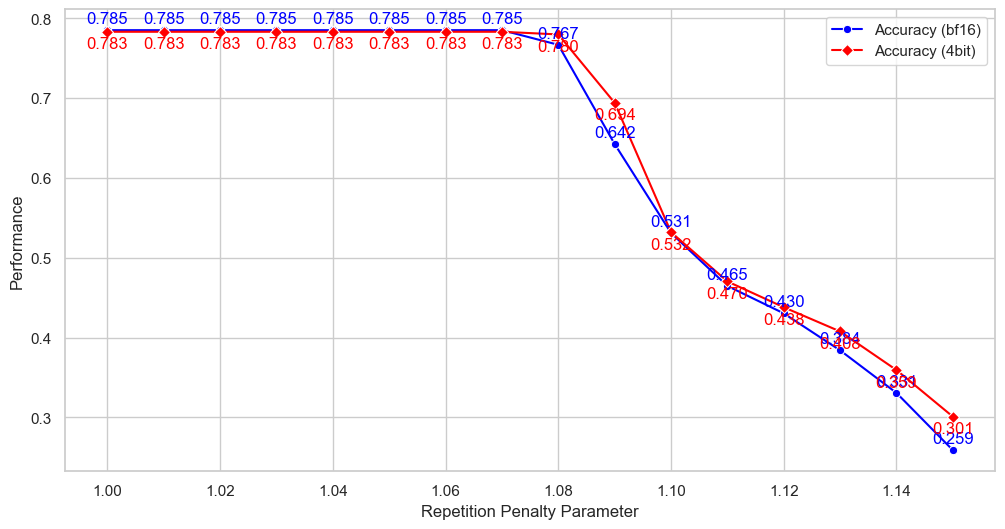

In [19]:
# plot accuracy and f1 vs repetition penalty
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    x="repetition penalty",
    y="Accuracy (bf16)",
    data=perf_df_4bit,
    ax=ax,
    color="blue",
    label="Accuracy (bf16)",
    marker="o",
)

sns.lineplot(
    x="repetition penalty",
    y="accuracy",
    data=perf_df_4bit,
    ax=ax,
    color="red",
    label="Accuracy (4bit)",
    marker="D",
)

for line_index, line in enumerate(ax.lines):
    # Get the data
    line_color = line.get_color()
    xdata, ydata = line.get_data()
    for index in range(xdata.size):
        ax.annotate(
            f"{ydata[index]:.3f}",
            xy=(xdata[index], ydata[index]),
            textcoords="offset points",
            xytext=(
                0,
                5 if line_index % 2 == 0 else -12,
            ),  # Adjusted for better visibility
            ha="center",
            color=line_color,
        )

plt.xlabel("Repetition Penalty Parameter")
plt.ylabel("Performance")
plt.legend()
plt.show()